In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=6TGOLLZAQF63WKBE'
r = requests.get(url)
data = r.json()
data_raw = data['Time Series (Daily)']

In [3]:
df = pd.DataFrame.from_dict(data_raw, orient='index')
df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True)
df = df[22:118]
df = df.iloc[::-1]

# change type to floats
df['Open'] = pd.to_numeric(df['Open']).astype(float)
df['High'] = pd.to_numeric(df['High']).astype(float)
df['Low'] = pd.to_numeric(df['Low']).astype(float)
df['Close'] = pd.to_numeric(df['Close']).astype(float)
df['Volume'] = pd.to_numeric(df['Volume']).astype(float)

train_data = df[5:]
test_data = df[:5]
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

In [4]:
print(train_data)
print(test_data)

         index    Open     High       Low   Close     Volume
0   2023-11-15  150.40  153.220  150.4000  152.58  4632519.0
1   2023-11-16  153.00  153.350  152.1300  153.06  3519172.0
2   2023-11-17  153.29  153.500  152.4601  152.89  4426676.0
3   2023-11-20  152.51  154.680  152.3500  154.35  3658936.0
4   2023-11-21  154.60  154.660  153.5100  153.91  2859508.0
..         ...     ...      ...       ...     ...        ...
86  2024-03-21  193.00  193.370  190.0100  191.90  6013561.0
87  2024-03-22  192.00  192.985  190.5100  190.84  3988398.0
88  2024-03-25  190.26  190.820  188.7500  188.79  3718289.0
89  2024-03-26  189.02  190.000  188.5000  188.50  4229535.0
90  2024-03-27  189.60  190.960  188.6000  190.80  3693305.0

[91 rows x 6 columns]
        index    Open      High      Low   Close     Volume
0  2023-11-08  149.25  149.6800  147.585  148.03  3618588.0
1  2023-11-09  146.55  146.9900  145.280  146.62  3412713.0
2  2023-11-10  147.44  149.1700  146.850  149.02  3179541.0
3  20

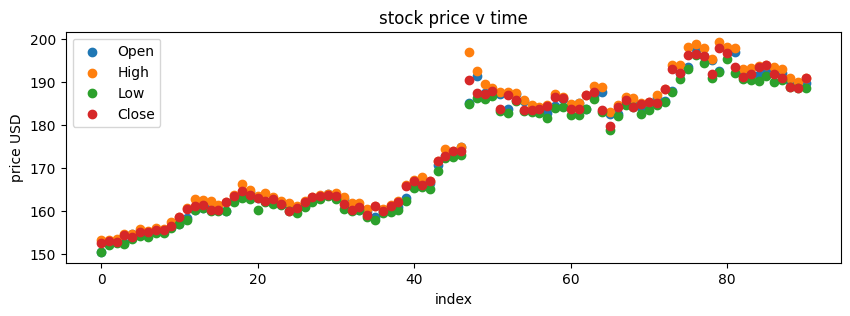

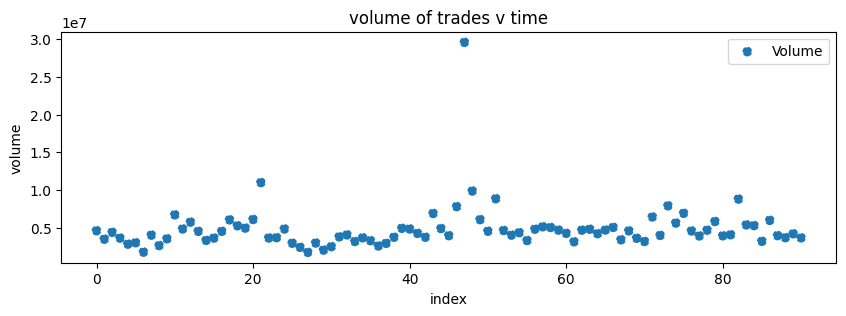

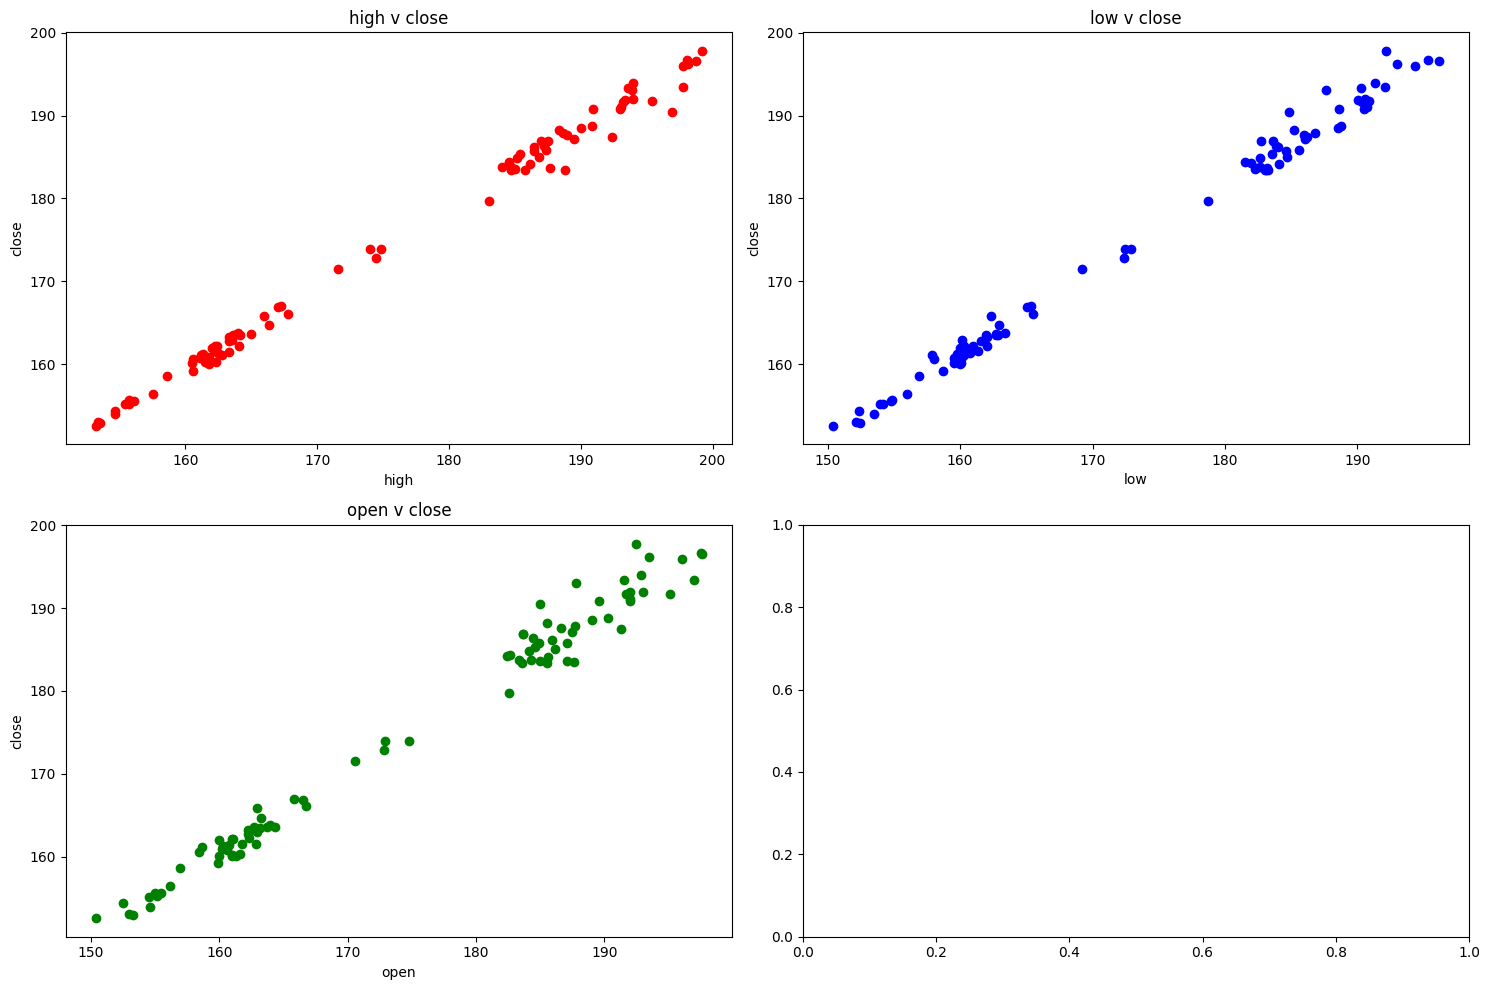

In [5]:
# stock price v time
plt.figure(figsize=(10, 3))
plt.scatter(train_data.index, train_data['Open'], label='Open')
plt.scatter(train_data.index, train_data['High'], label='High')
plt.scatter(train_data.index, train_data['Low'], label='Low')
plt.scatter(train_data.index, train_data['Close'], label='Close')
plt.xlabel('index')
plt.ylabel('price USD')
plt.title('stock price v time')
plt.legend()
plt.show()

# volume of trades v time
plt.figure(figsize=(10, 3))
plt.scatter(train_data.index, train_data['Volume'], label='Volume', linestyle='--')
plt.xlabel('index')
plt.ylabel('volume')
plt.title('volume of trades v time')
plt.legend()
plt.show()

# comparisons to close price
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].scatter(train_data['High'], train_data['Close'], color='red')
axs[0, 0].set_title('high v close')
axs[0, 0].set_xlabel('high')
axs[0, 0].set_ylabel('close')

axs[0, 1].scatter(train_data['Low'], train_data['Close'], color='blue')
axs[0, 1].set_title('low v close')
axs[0, 1].set_xlabel('low')
axs[0, 1].set_ylabel('close')

axs[1, 0].scatter(train_data['Open'], train_data['Close'], color='green')
axs[1, 0].set_title('open v close')
axs[1, 0].set_xlabel('open')
axs[1, 0].set_ylabel('close')

plt.tight_layout()
plt.show()

In [6]:
# These graphs compare the stock price over time, the volume of trades over time, and comparisons of the high, low, and open price 
# to the closing price.

# The comparisons to the closing price and the stock price v time have a positive linear relationship with the x axis.
# The only graph that does not is the volume of trades v time, as that does not correlate with time.

In [7]:
# Runs gradient descent for input data for T iterations and a learning rate of alpha
def grad_descent(X,y,T,alpha):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    for i in range(T):
        f[i] = 0.5*np.linalg.norm(X.dot(theta)-y)**2
        g = np.transpose(X).dot(X.dot(theta)-y)
        theta = theta - alpha*g
    return(theta,f)

In [8]:
X = train_data[['Open', 'High', 'Low']].to_numpy()
X = np.hstack([np.ones((X.shape[0], 1)), X])
y = train_data['Close'].to_numpy()
T = 10
alpha = 0.0000001

theta,loss = grad_descent(X,y,T,alpha)

print("Bias:", theta[:1])
print("Weights:", theta[1:])
print("Initial Loss:", loss[1])
print("  V")
print("Final Loss:", loss[-1])

Bias: [0.00190136]
Weights: [0.33338902 0.3362949  0.33117039]
Initial Loss: 37654.469201453874
  V
Final Loss: 60.06235197843325


In [9]:
# In this problem, the dependent variables are the open, high, and low prices, and the dependent variable is the closing price.
# The weights are 0.33338902, 0.3362949, and 0.33117039 for open, high, and low prices respectively.
# The bias is 0.00190136.

Predictions: [148.97261486912862, 146.4044834915593, 147.9542601117417, 148.23122157200936, 149.90322623951573]
Mean Squared Error: 0.46896208232273395


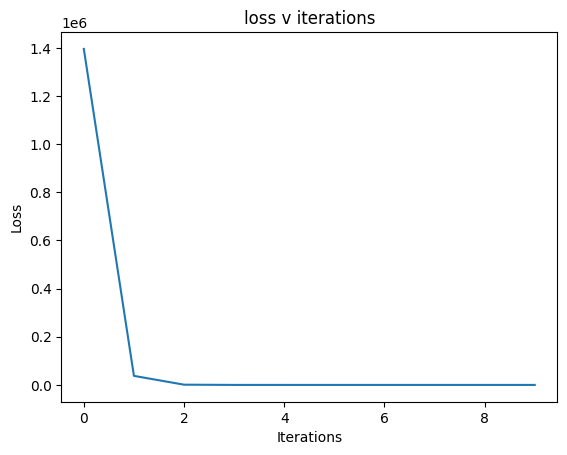

In [313]:
# test model
predictions = []
for index, row in test_data.iterrows():
    predictions.append(theta[0] + theta[1]*row['Open'] + theta[2]*row['High'] + theta[3]*row['Low'])
print("Predictions:", predictions)

#calculate MSE
actual = test_data['Close'].to_numpy()
mse = ((actual - predictions) ** 2).mean()
print("Mean Squared Error:", mse)

# print loss over iterations
plt.plot(range(T),loss)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("loss v iterations")
plt.show()

In [11]:
# This graph shows how the loss of the linear regression method changes with the number of iterations


# The mean squared error is quite low for the predictions, which means that the model is accurately predicting the closing price.
# However, because the weights are all about the same, the model is seemingly just approximately averageing the 3 inputs.
# The loss reaches a minimum value of arounnd 60 from 37658 very quickly, in only a few iterations.

In [12]:
# Regularization reduces overfitting by encouraging coefficients to be smaller.
# Ridge regression specifically helps to not only reduce overfitting, but is also better for multicolinear datasets because it adds
# a penalty to the coefficients that realates to the square of the size.

In [296]:
# Runs ridge regression  for input data for T iterations, a learning rate of alpha, and normalization term of lambda
def ridge_grad_descent(X,y,T,alpha,lambda_p):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    for i in range(T):
        predictions = X.dot(theta)
        errors = predictions - y
        f[i] = (1/m) * 0.5 * (np.dot(errors, errors) + lambda_p * np.dot(theta[1:], theta[1:]))
        g = (1/m) * (X.T.dot(errors) + lambda_p * np.concatenate(([0], theta[1:])))
        theta = theta - alpha*g
    return(theta,f)

Bias: [6.41717394e-08]
Weights: [1.09194787e-05 1.10079750e-05 1.08545778e-05 1.87010319e-03
 1.90097721e-03 1.84736561e-03]
Initial Loss: 7805.855461404714
  V
Final Loss: 101.99131133821162


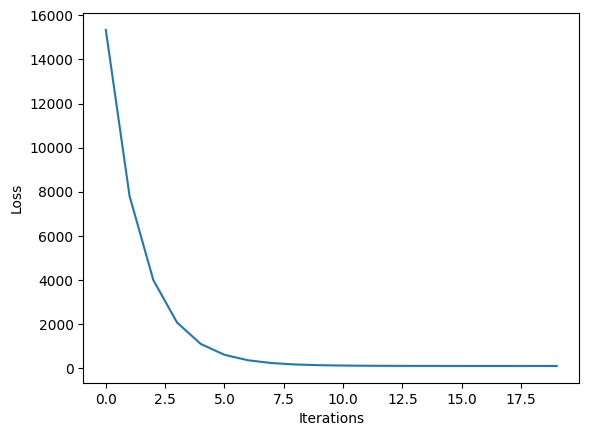

In [304]:
X = train_data[['Open', 'High', 'Low']].to_numpy()
X_quad = np.hstack([X, X**2])
X_quad_bias = np.hstack([np.ones((X_quad.shape[0], 1)), X_quad])
y_ridge = train_data['Close'].to_numpy()
T_ridge = 20
alpha_ridge = 0.0000000001
lambda_p = 0.1

theta_ridge,loss_ridge = ridge_grad_descent(X_quad_bias,y_ridge,T_ridge,alpha_ridge,lambda_p)
print("Bias:", theta_ridge[:1])
print("Weights:", theta_ridge[1:])
print("Initial Loss:", loss_ridge[1])
print("  V")
print("Final Loss:", loss_ridge[-1])

# print loss over iterations
plt.plot(range(T_ridge),loss_ridge)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("loss v iterations")
plt.show()

In [311]:
# This graph shows how the loss of the ridge regression method changes with the number of iterations

# This function takes in the weights and biases of the model, as well as the input data, and predicts the output
def predict(th, i):
    p = []
    for index, row in i.iterrows():
        p.append(th[0] +
                  th[1]*row['Open'] + 
                  th[2]*row['High'] + 
                  th[3]*row['Low'] +
                  th[4]*row['Open']**2 + 
                  th[5]*row['High']**2 + 
                  th[6]*row['Low']**2)
    return p

# test model
predictions_ridge = predict(theta_ridge, test_data)
print("Predictions:", predictions_ridge)

#calculate MSE
actual_ridge = test_data['Close'].to_numpy()
print(actual_ridge)
mse_ridge = ((actual_ridge - predictions_ridge) ** 2).mean()
print("Mean Squared Error:", mse_ridge)

Predictions: [124.49025220100513, 120.2324600240685, 122.79643431358811, 123.24784716293811, 126.04817522537708]
[148.03 146.62 149.02 148.1  150.41]
Mean Squared Error: 629.845079343468


In [309]:
# The MSE for this model was much higher than for the older one. From the graph below, it is clear that the prediction IS following
# the trend of the actual data, but it is over-empasizing its predictions.|

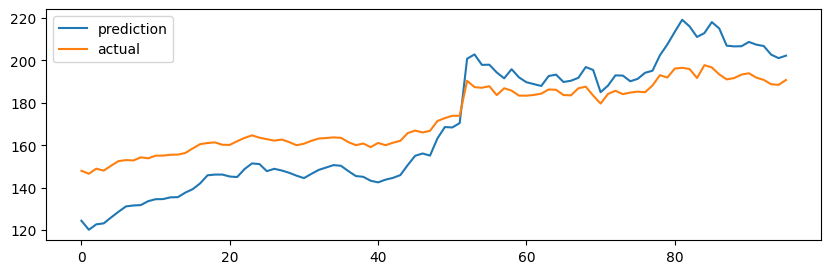

In [310]:
# test model all
predictions_ridge_2 = predict(theta_ridge, df)
actual_ridge_2 = df['Close'].to_numpy()
plt.figure(figsize=(10, 3))
plt.plot(predictions_ridge_2, label='prediction')
plt.plot(actual_ridge_2, label='actual')
plt.legend()
plt.show()

In [ ]:
# With this technique, we can predict the closing stock price of IBM to a close degree, however it would not be useful in the real world.
# Our model can predict a closing value clost to the starting value, but what we really care about is if the closing value is 
# above or below the starting value, but our model cannot accurately predict this as it is within the margin of error.
# While our model would estimate approximately the correct value, it would not be close enough for it to be profitable.

# The lambda coefficient for ridge regression was picked through trial and error, not too big as to constrain the data, but it didn't
# seem to have a strong effect.